<a href="https://colab.research.google.com/github/Visha17/SPARKS-FOUNDATION/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science and Business-Analytics Internship task at The Sparks Foundation  (TSF) 

Name: Visalatchi

**LOADING** **LIBRARIES** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

**LOADING DATASET**

In [ ]:
data = pd.read_csv ('http://bit.ly/w-data')
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.shape

(25, 2)

**DATA PREPARATION**

In [ ]:
X = data.iloc[:, :-1].values
#print(X)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
Y = data.iloc[:,1].values
#print(Y)
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**DATA VISUALISATION**

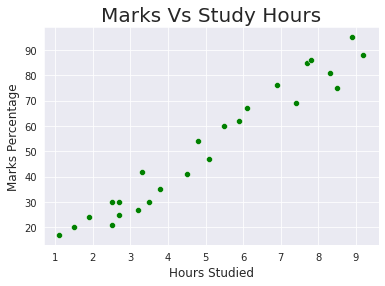

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'], color="green")
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


**TRAINING ALGORITHM**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), Y_train)
print(" Training is Done!!")


 Training is Done!!


**Ploting**

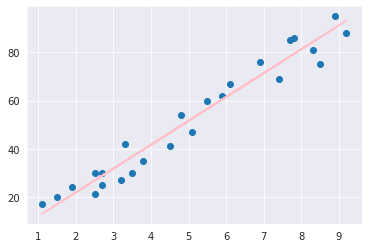

In [ ]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter (X,Y)
plt.plot (X, line, color = 'Pink')
plt.show()

**Making Predictions**

In [ ]:
print(X_test)

Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual vs Predicted**

In [ ]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
print("Training score:", regressor.score(X_train, Y_train))
print("Testing score:", regressor.score(X_test, Y_test))

Training score: 0.9515510725211552
Testing score: 0.9454906892105354


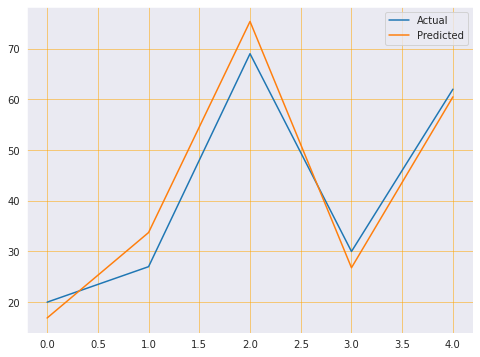

In [ ]:
data.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'Black')
plt.grid(which='major', linewidth='0.5', color = 'Orange')
plt.show()

In [ ]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737539


**EVALUATION**

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root mean squared Error: 4.647447612100373
